In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.integrate import quad

In [11]:
integrand = lambda z: 1/np.sqrt(2*np.pi)*np.exp(-0.5 * z**2)

# def bayes_error(d):
#     lb = np.sqrt(np.sum([1/i for i in range(1, d+1)]))
#     return quad(integrand, lb, np.inf)

# def plugin_error(d):
#     lb = np.sqrt(np.sum([1/i for i in range(1, d+1)]))
#     return quad(integrand, lb, np.inf)


def errors(d, n):
    d_sum = np.sum([1/i for i in range(1, d+1)])
    lb = np.sqrt(d_sum)
    bayes_error = quad(integrand, lb, np.inf)[0]
    
    lb = d_sum / (np.sqrt((1 + 1/n) * d_sum + d/n))
    plugin_error = quad(integrand, lb, np.inf)[0]
    
    return bayes_error, plugin_error

In [18]:
n = 100
dim_range = np.asarray([10,50,100,250,500,1000,2500,5e3,1e4,5e4,1e5,5e5,1e6,1e7,1e8]).astype(int)
bayes_errors, plugin_errors = list(zip(*[errors(d, n) for d in dim_range]))

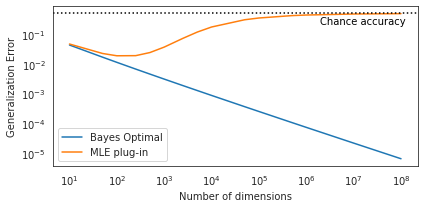

In [42]:
sns.set_style('white')

f, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(dim_range, bayes_errors, label='Bayes Optimal')
ax.plot(dim_range, plugin_errors, label='MLE plug-in')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axhline(0.5, ls=':', c='black')
ax.text(0.85, 0.91, 'Chance accuracy', horizontalalignment='center', c='black',
         verticalalignment='center', transform=ax.transAxes)#, fontsize=12)
# ax.set_yticks([0.5, 10**-1])
# ax.set_yticklabels([0.5, 10**-1])
ax.set_xlabel('Number of dimensions')
ax.set_ylabel('Generalization Error')
ax.legend()

plt.tight_layout()
plt.savefig('./figures/trunk.pdf')
plt.show()